In [39]:
"""
En este jupyter notebook analizamos imagenes obtenidas del acoplamiento
de dímeros horizontales, verticales y diagonales.
"""

'\nEn este jupyter notebook analizamos imagenes obtenidas del acoplamiento\nde dímeros horizontales, verticales y diagonales.\n'

## Integrantes Grupo 10:
- Ignacio Acevedo R.
- Pablo Perez B.

**DFI, Universidad de Chile**

*Física Experimental II, Primavera 2020*

**Profesor:** Rodrigo Vicencio P.

In [40]:
# importamos los paquetes que ocuparemos para el analisis

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab
from scipy.constants import golden


# setting params for plot style
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)


# Prueba de Importacion Imagen en Python

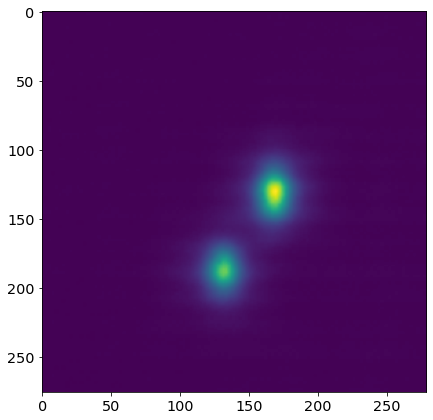

In [41]:
# definimos el texto asociado al path
text1 = '/mnt/c/Users/ignac/OneDrive - Universidad de Chile/Escritorio/Experimental II/Fisica-Experimental-II/Redes Fotónicas/Grupo 10/06-09/imagen '
text2 = ' h byn.png'
text3 = ' v byn.png'

fotos = np.arange(1, 30)

test = text1 + str(np.random.randint(1, 30)) + text2

img_t = mpimg.imread(test)[140:-180,90:-900, 0]

# graficamos
plt.figure(figsize=(15, 7))
plt.imshow(img_t)

# Polarizacion Horizontal

Ploteamos las imagenes obtenidas para la polarización horizontal. La escala corresponde a valores entre 0 y 1, de una imagen BW.

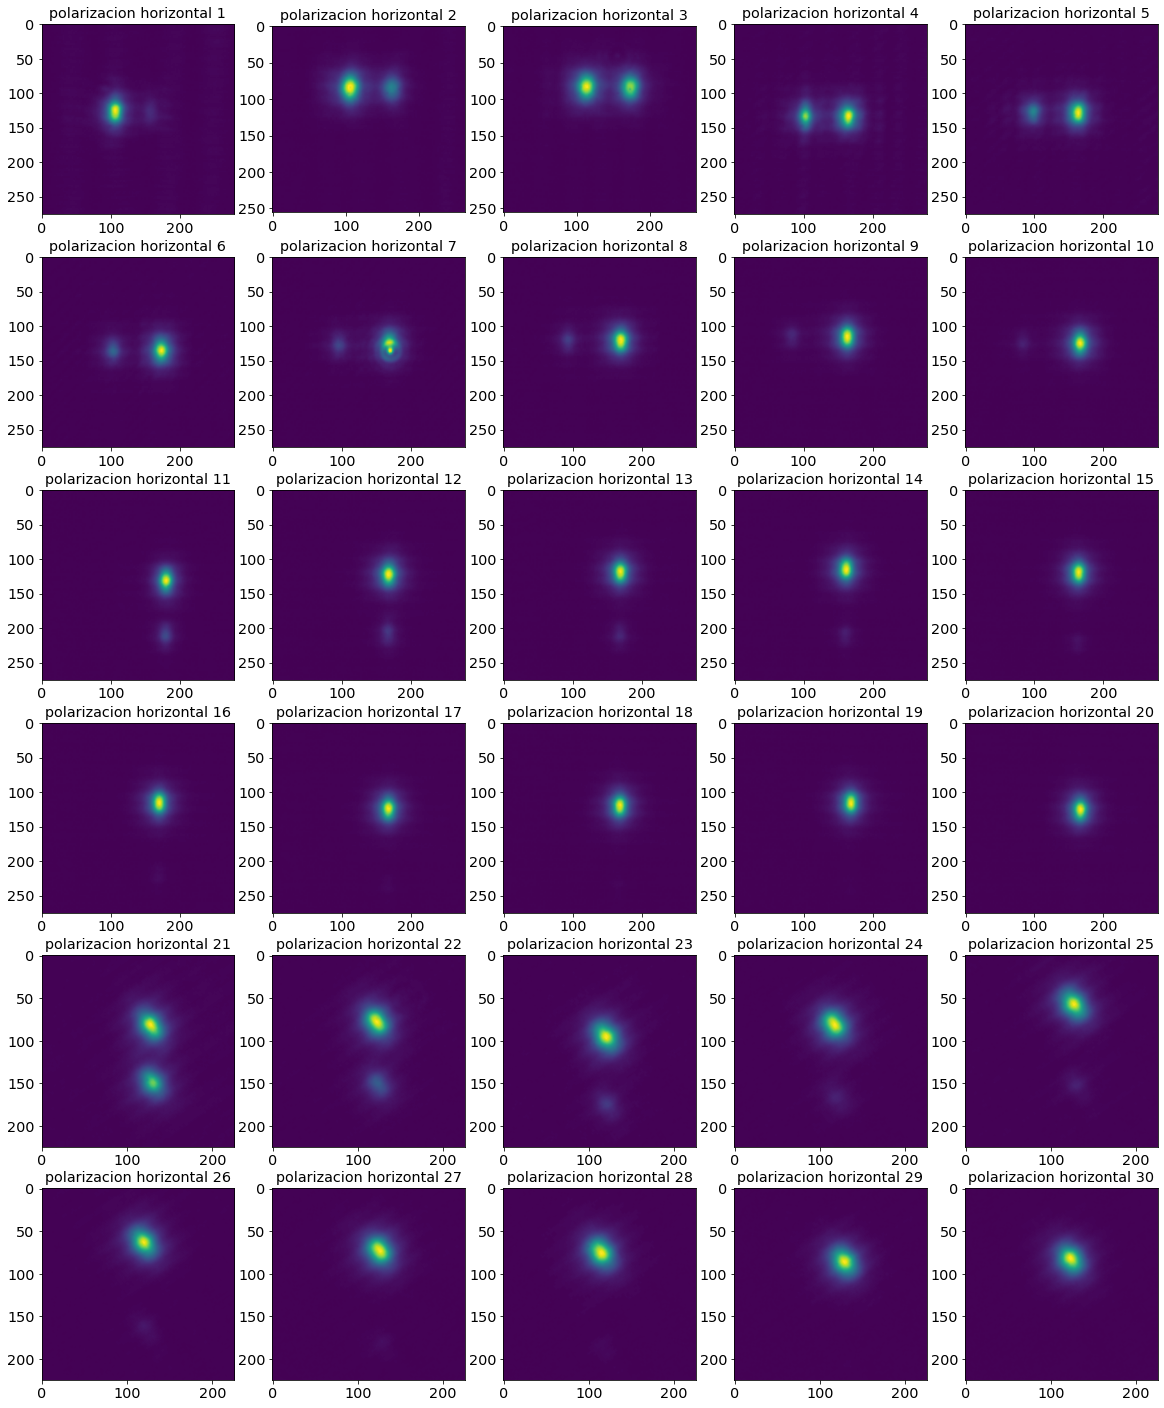

In [42]:
imagenes_h = []

from scipy import ndimage

cols = 5
fig, axes = plt.subplots(ncols=cols, nrows=6, figsize=(20,25))

for i in range(30):
    
    path = text1 + str(i+1) + text2
    if i == 1 or i == 2:
        imagenes_h.append(mpimg.imread(path)[160:-180, 255:-750, 0])
    
    elif 20 <= i:
        degrees = 35
        rot = ndimage.rotate(mpimg.imread(path)[100:-120, 40:-850, 0], degrees)[150:-150, 150:-150]
        imagenes_h.append(rot)
        # imagenes_h.append(mpimg.imread(path)[120:-140, 60:-870, 0])

    else:
        imagenes_h.append(mpimg.imread(path)[140:-180, 90:-900, 0])

    col = i % cols
    row = i // cols

    axes[row][col].imshow(imagenes_h[i]);
    axes[row][col].set_title(f'polarizacion horizontal {i+1}')
    # axes[row][col].legend()
    # axes[row][col].grid()

## Dímeros Horizontales con Polarizacion Horizontal

Graficamos las potencias asociadas a cada imagen, sumando sobre el eje que muestre los dos perfiles de la señal.

Además obtenemos los maximos de cada dímero, y graficamos el rango que se considera para la obtención del área de la potencia en cada guía.

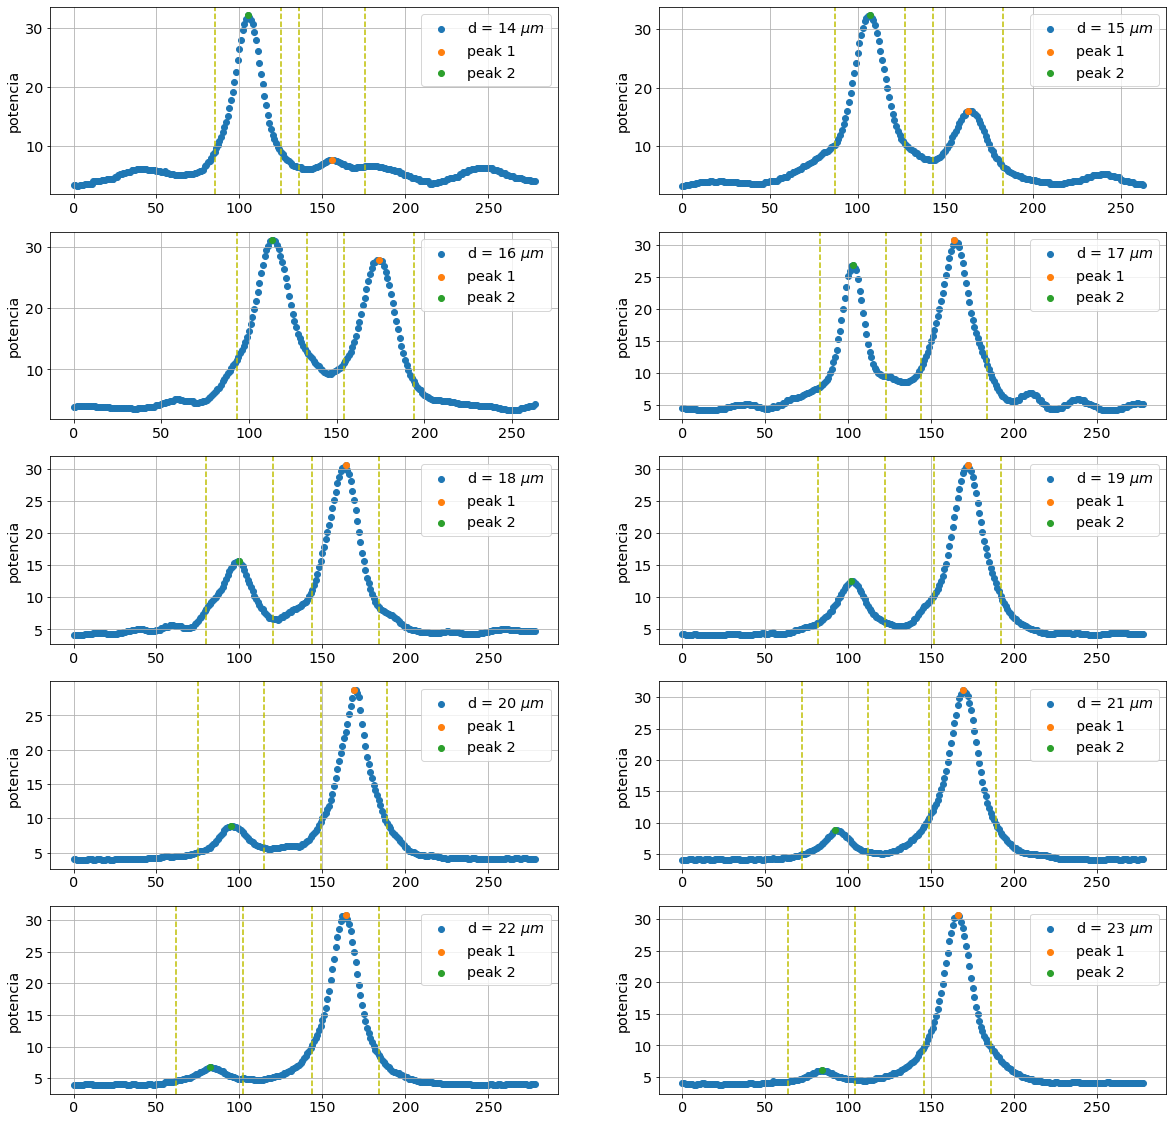

In [43]:
potencias_h = []
area_h = []
peak_h = []

width = 20

# Obtenemos el perfil de las potencias asociadas
for i in range(30):

    if i < 10:
        P = np.sum(imagenes_h[i], axis=0)
    else:
        P = np.sum(imagenes_h[i], axis=1)
    
    potencias_h.append(P)
    

# Ploteamos
cols = 2
fig, axes = plt.subplots(ncols=cols, nrows=5, figsize=(20,20))

for i in range(10):
    
    col = i % cols
    row = i // cols

    axes[row][col].scatter(np.arange(len(potencias_h[i])), potencias_h[i],
                            label=f'd = {np.arange(14, 24)[i]} $\\mu m$');
    # axes[row][col].set_title(f'horizontal {i+1}')

    if i >= 3:
        arg_p_max1 = np.argmax(potencias_h[i])
        arg_p_max2 = np.argmax(potencias_h[i][:arg_p_max1-2*width])

        axes[row][col].scatter(arg_p_max1, potencias_h[i][arg_p_max1], label='peak 1')
        axes[row][col].scatter(arg_p_max2, potencias_h[i][arg_p_max2], label='peak 2')
    
    else:
        arg_p_max2 = np.argmax(potencias_h[i])
        arg_p_max1 = arg_p_max2+2*width + np.argmax(potencias_h[i][arg_p_max2+2*width:])

        axes[row][col].scatter(arg_p_max1, potencias_h[i][arg_p_max1], label='peak 1')
        axes[row][col].scatter(arg_p_max2, potencias_h[i][arg_p_max2], label='peak 2')

    axes[row][col].axvline(arg_p_max1 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max1 + width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 + width, color='y', linestyle='dashed')

    a = np.sum(potencias_h[i][arg_p_max1 - width:arg_p_max1 + width])
    b = np.sum(potencias_h[i][arg_p_max2 - width:arg_p_max2 + width])
    area_h.append(b / a)
    peak_h.append(potencias_h[i][arg_p_max2] / potencias_h[i][arg_p_max1])

    axes[row][col].set_ylabel('potencia')
    axes[row][col].legend()
    axes[row][col].grid()

    


## Grafico del Ratio de Intensidades $P_1 / P_2$

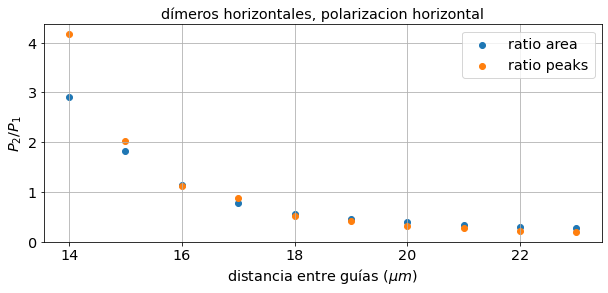

In [44]:
plt.figure(figsize=(10, 4))
plt.scatter(np.arange(14, 24), area_h, label='ratio area')
plt.scatter(np.arange(14, 24), peak_h, label='ratio peaks')
plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal')
plt.legend()
plt.grid()

- Observamos que hay un decaimiento exponencial en funcion de la distancia entre guías

## Ajuste de las curvas de acoplamiento

Se hace un fiteo exponencial de la forma $A \exp (-B d)$ con $A, B$ constantes a determinar, y $d$ la distancia entre guías.

Para esto se ocupan los programas
- *curvefit* de **scipy**
- *polyfit* de **numpy**

In [45]:
from scipy import optimize
def model(d, A, B): return A*np.exp(-B*d)

x0 = [1, 0.01]

params_area, params_area_std = optimize.curve_fit(model, np.arange(14, 24), area_h, x0)
params_peak, params_peak_std = optimize.curve_fit(model, np.arange(14, 24), peak_h, x0)

p_area = np.polyfit(np.arange(14, 24), np.log(area_h), 1)
p_peak = np.polyfit(np.arange(14, 24), np.log(peak_h), 1)

Area 

Parametros con CurveFit: 
A = 670.46, B = 0.39
Parametros con Polyfit: 
A = 77.58, B = 0.26

Peaks

Parametros con CurveFit: 
A = 11640.76, B = 0.57
Parametros con Polyfit: 
A = 238.04, B = 0.32


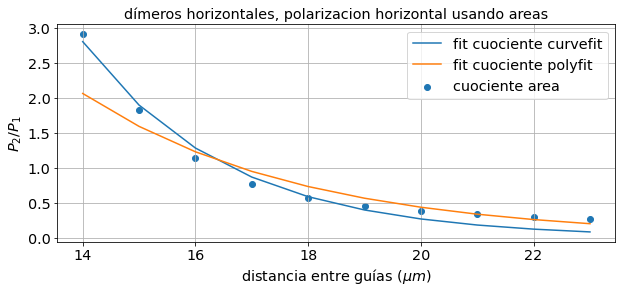

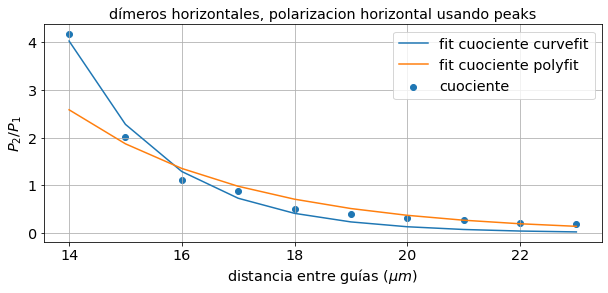

In [46]:
plt.figure(figsize=(10, 4))
plt.scatter(np.arange(14, 24), area_h, label='cuociente area')
plt.plot(np.arange(14, 24), model(np.arange(14, 24), params_area[0], params_area[1]), label='fit cuociente curvefit')

plt.plot(np.arange(14, 24), np.exp(p_area[0]*np.arange(14, 24) + p_area[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando areas')
plt.legend()
plt.grid()

print('Area \n')
print(f'Parametros con CurveFit: \nA = {params_area[0]:.2f}, B = {params_area[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_area[1]):.2f}, B = {-p_area[0]:.2f}')


plt.figure(figsize=(10, 4))
plt.scatter(np.arange(14, 24), peak_h, label='cuociente')
plt.plot(np.arange(14, 24), model(np.arange(14, 24), params_peak[0], params_peak[1]), label='fit cuociente curvefit')

plt.plot(np.arange(14, 24), np.exp(p_peak[0]*np.arange(14, 24) + p_peak[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando peaks')
plt.legend()
plt.grid()

print('\nPeaks\n')
print(f'Parametros con CurveFit: \nA = {params_peak[0]:.2f}, B = {params_peak[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_peak[1]):.2f}, B = {-p_peak[0]:.2f}')

## Dímeros Verticales con Polarizacion Horizontal

Graficamos las potencias asociadas a cada imagen, sumando sobre el eje que muestre los dos perfiles de la señal.

Además obtenemos los maximos de cada dímero, y graficamos el rango que se considera para la obtención del área de la potencia en cada guía.

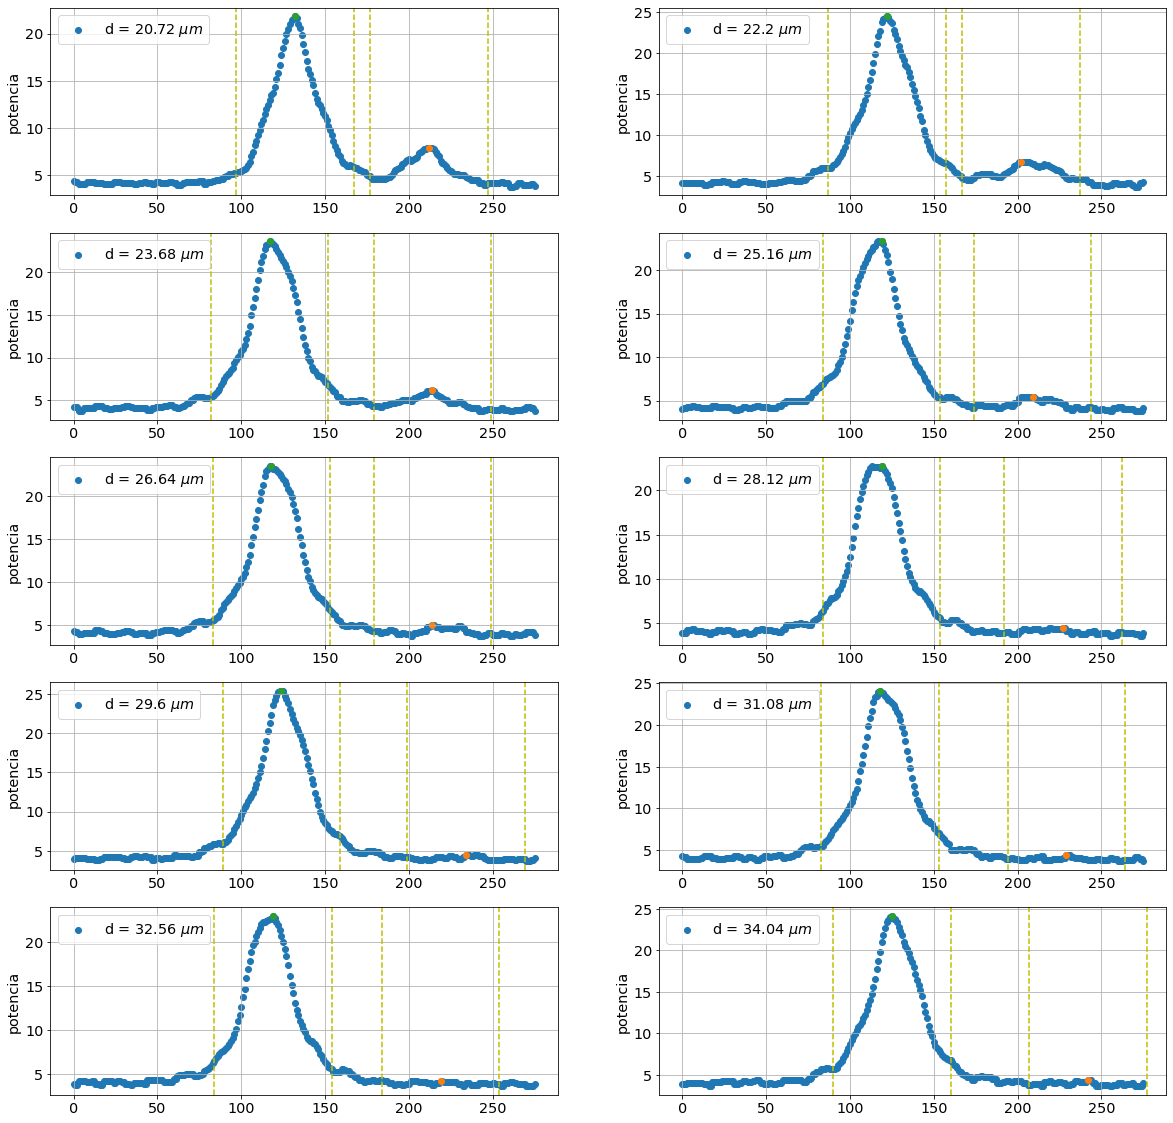

In [47]:
area_h = []
peak_h = []

width = 20

cols = 2
fig, axes = plt.subplots(ncols=cols, nrows=5, figsize=(20,20))

for i in range(10, 20):
    
    col = (i-10) % cols
    row = (i-10) // cols

    axes[row][col].scatter(np.arange(len(potencias_h[i])), potencias_h[i], label=f'd = {1.48*np.arange(14, 24)[i-10]} $\\mu m$');
    # axes[row][col].set_title(f'horizontal {i+1}')
    axes[row][col].set_ylabel('potencia')
    axes[row][col].legend()
    axes[row][col].grid()

    # if i >= 3:
    # arg_p_max1 = np.argmax(potencias_h[i])
    # arg_p_max2 = arg_p_max2+2*width + np.argmax(potencias_h[i][arg_p_max1+2*width:])

    # axes[row][col].scatter(arg_p_max1, potencias_h[i][arg_p_max1])
    # axes[row][col].scatter(arg_p_max2, potencias_h[i][arg_p_max2])
    
    # else:

    if i-10 < 4:
        width = 35

    else:
        width = 35

    arg_p_max2 = np.argmax(potencias_h[i])
    arg_p_max1 = arg_p_max2+2*width + np.argmax(potencias_h[i][arg_p_max2+2*width:])

    axes[row][col].scatter(arg_p_max1, potencias_h[i][arg_p_max1], label='peak 1')
    axes[row][col].scatter(arg_p_max2, potencias_h[i][arg_p_max2], label='peak 2')

    axes[row][col].axvline(arg_p_max1 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max1 + width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 + width, color='y', linestyle='dashed')

    a = np.sum(potencias_h[i][arg_p_max1 - width:arg_p_max1 + width])
    b = np.sum(potencias_h[i][arg_p_max2 - width:arg_p_max2 + width])
    area_h.append(a / b)
    peak_h.append(potencias_h[i][arg_p_max1] / potencias_h[i][arg_p_max2])


## Grafico del Ratio de Intensidades $P_1 / P_2$

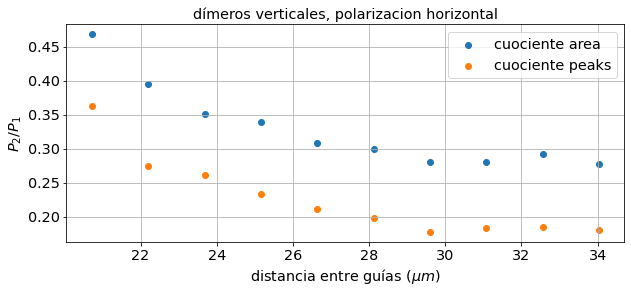

In [48]:
plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 24), area_h, label='cuociente area')
plt.scatter(1.48*np.arange(14, 24), peak_h, label='cuociente peaks')
plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros verticales, polarizacion horizontal')
plt.legend()
plt.grid()

- Observamos que hay un decaimiento exponencial en funcion de la distancia entre guías.
- En este caso, no es tan claro dicho comportamiento para distancias $\sim 20 \mu m$
- Se observa que el decaimiento usando peaks es más robusto

## Ajustamos estos cuocientes igual que antes

In [49]:
x0 = [1, 0.001]

params_area, params_area_std = optimize.curve_fit(model, 1.48*np.arange(14, 24), area_h, x0)
params_peak, params_peak_std = optimize.curve_fit(model, 1.48*np.arange(14, 24), peak_h, x0)

p_area = np.polyfit(1.48*np.arange(14, 24), np.log(area_h), 1)
p_peak = np.polyfit(1.48*np.arange(14, 24), np.log(peak_h), 1)

Area 

Parametros con CurveFit: 
A = 0.96, B = 0.04
Parametros con Polyfit: 
A = 0.85, B = 0.03

Peaks

Parametros con CurveFit: 
A = 1.02, B = 0.06
Parametros con Polyfit: 
A = 0.82, B = 0.05


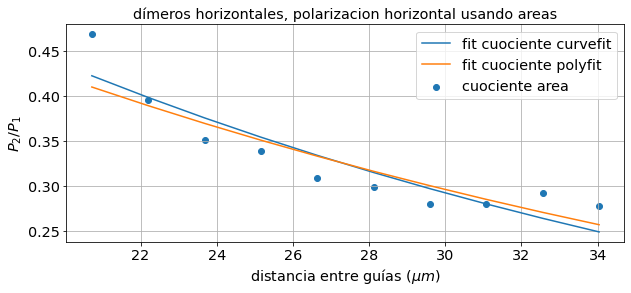

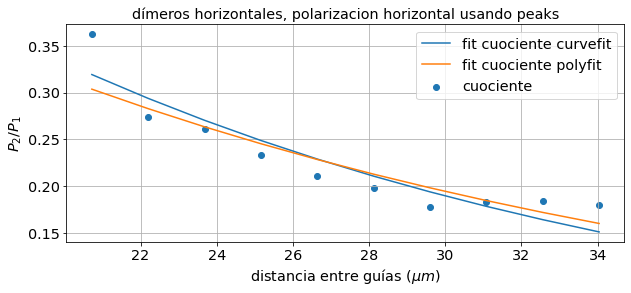

In [50]:
plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 24), area_h, label='cuociente area')
plt.plot(1.48*np.arange(14, 24), model(1.48*np.arange(14, 24), params_area[0], params_area[1]), label='fit cuociente curvefit')

plt.plot(1.48*np.arange(14, 24), np.exp(p_area[0]*1.48*np.arange(14, 24) + p_area[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando areas')
plt.legend()
plt.grid()

print('Area \n')
print(f'Parametros con CurveFit: \nA = {params_area[0]:.2f}, B = {params_area[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_area[1]):.2f}, B = {-p_area[0]:.2f}')


plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 24), peak_h, label='cuociente')
plt.plot(1.48*np.arange(14, 24), model(1.48*np.arange(14, 24), params_peak[0], params_peak[1]), label='fit cuociente curvefit')

plt.plot(1.48*np.arange(14, 24), np.exp(p_peak[0]*1.48*np.arange(14, 24) + p_peak[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando peaks')
plt.legend()
plt.grid()

print('\nPeaks\n')
print(f'Parametros con CurveFit: \nA = {params_peak[0]:.2f}, B = {params_peak[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_peak[1]):.2f}, B = {-p_peak[0]:.2f}')

- No vemos un claro ajuste con los datos.
- Por lo anterior, ajustaremos el modelo exponencial **sin considerar los últimos datos.**

## Ajuste sin considerar los últimos valores

In [51]:
x0 = [1, 0.001]

params_area, params_area_std = optimize.curve_fit(model, 1.48*np.arange(14, 20), area_h[:-4], x0)
params_peak, params_peak_std = optimize.curve_fit(model, 1.48*np.arange(14, 20), peak_h[:-4], x0)

p_area = np.polyfit(1.48*np.arange(14, 20), np.log(area_h[:-4]), 1)
p_peak = np.polyfit(1.48*np.arange(14, 20), np.log(peak_h[:-4]), 1)

Area 

Parametros con CurveFit: 
A = 1.62, B = 0.06
Parametros con Polyfit: 
A = 1.47, B = 0.06

Peaks

Parametros con CurveFit: 
A = 1.85, B = 0.08
Parametros con Polyfit: 
A = 1.59, B = 0.08


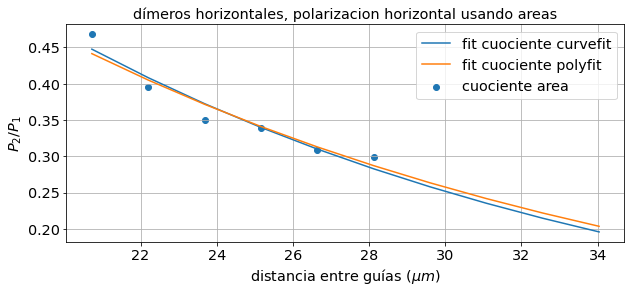

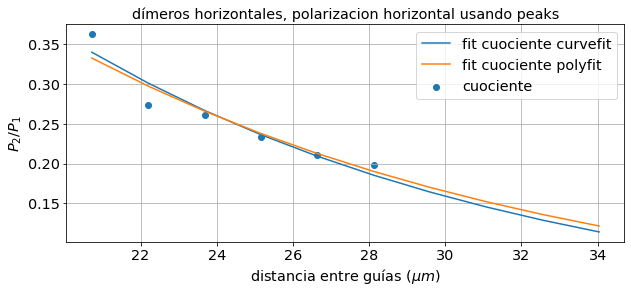

In [52]:
plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 20), area_h[:-4], label='cuociente area')
plt.plot(1.48*np.arange(14, 24), model(1.48*np.arange(14, 24), params_area[0], params_area[1]), label='fit cuociente curvefit')

plt.plot(1.48*np.arange(14, 24), np.exp(p_area[0]*1.48*np.arange(14, 24) + p_area[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando areas')
plt.legend()
plt.grid()

print('Area \n')
print(f'Parametros con CurveFit: \nA = {params_area[0]:.2f}, B = {params_area[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_area[1]):.2f}, B = {-p_area[0]:.2f}')


plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 20), peak_h[:-4], label='cuociente')
plt.plot(1.48*np.arange(14, 24), model(1.48*np.arange(14, 24), params_peak[0], params_peak[1]), label='fit cuociente curvefit')

plt.plot(1.48*np.arange(14, 24), np.exp(p_peak[0]*1.48*np.arange(14, 24) + p_peak[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando peaks')
plt.legend()
plt.grid()

print('\nPeaks\n')
print(f'Parametros con CurveFit: \nA = {params_peak[0]:.2f}, B = {params_peak[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_peak[1]):.2f}, B = {-p_peak[0]:.2f}')

- Se observa un mejor ajuste

# Dímeros Diagonales con Polarizacion Horizontal

Graficamos las potencias asociadas a cada imagen, sumando sobre el eje que muestre los dos perfiles de la señal.

Además obtenemos los maximos de cada dímero, y graficamos el rango que se considera para la obtención del área de la potencia en cada guía.

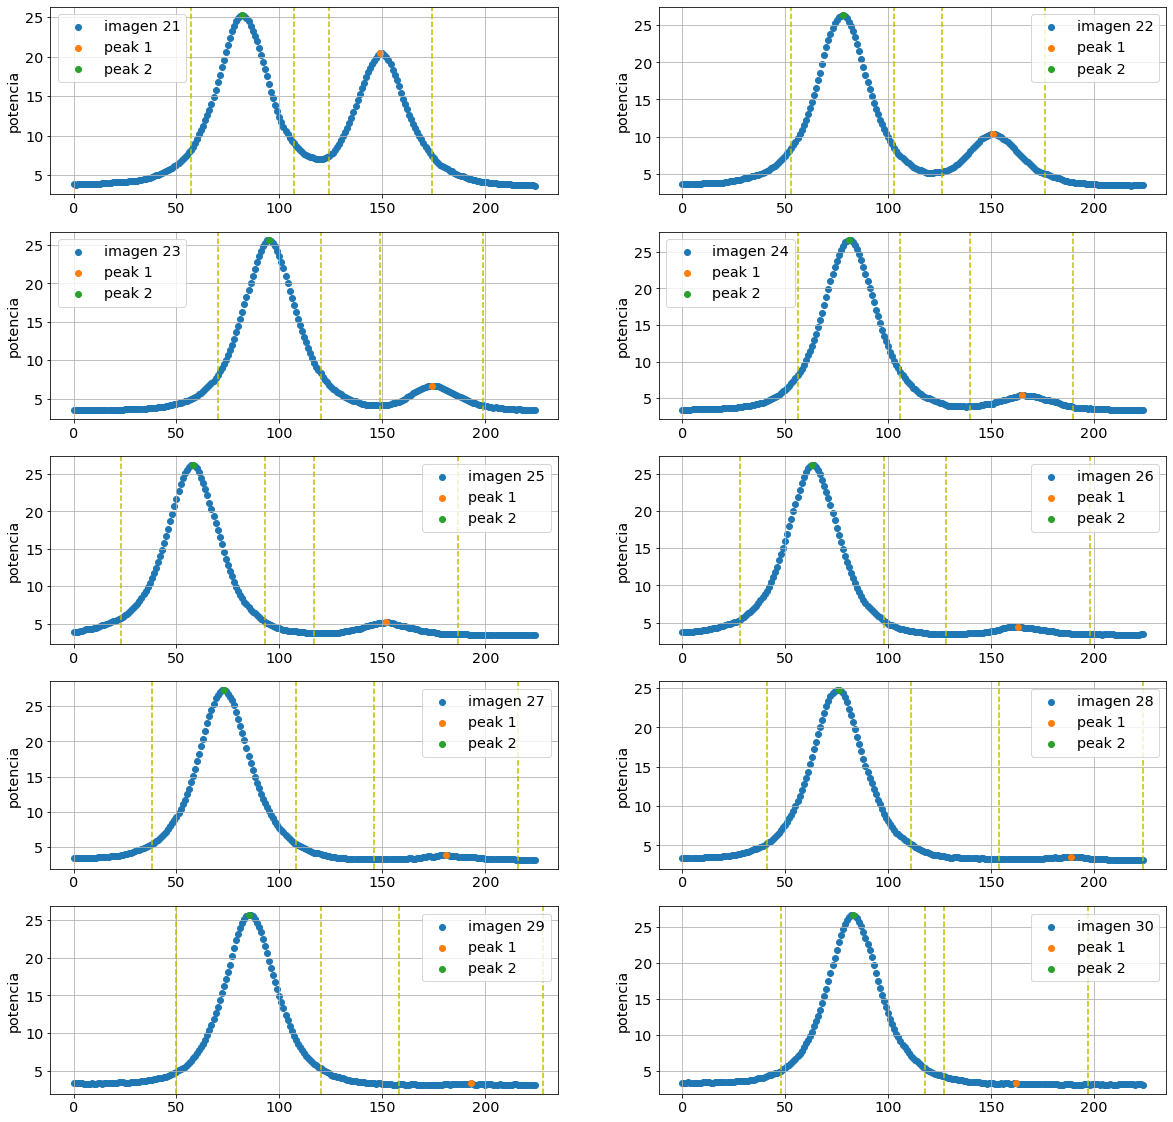

In [53]:
area_h = []
peak_h = []

width = 20

cols = 2
fig, axes = plt.subplots(ncols=cols, nrows=5, figsize=(20,20))

for i in range(20, 30):
    
    col = (i-20) % cols
    row = (i-20) // cols

    axes[row][col].scatter(np.arange(len(potencias_h[i])), potencias_h[i], label=f'imagen {i+1}');
    # axes[row][col].set_title(f'horizontal {i+1}')

    # if i >= 3:
    # arg_p_max1 = np.argmax(potencias_h[i])
    # arg_p_max2 = arg_p_max2+2*width + np.argmax(potencias_h[i][arg_p_max1+2*width:])

    # axes[row][col].scatter(arg_p_max1, potencias_h[i][arg_p_max1])
    # axes[row][col].scatter(arg_p_max2, potencias_h[i][arg_p_max2])
    
    # else:

    if i-20 < 4:
        width = 25

    else:
        width = 35

    arg_p_max2 = np.argmax(potencias_h[i])
    arg_p_max1 = arg_p_max2+2*width + np.argmax(potencias_h[i][arg_p_max2+2*width:])

    axes[row][col].scatter(arg_p_max1, potencias_h[i][arg_p_max1], label='peak 1')
    axes[row][col].scatter(arg_p_max2, potencias_h[i][arg_p_max2], label='peak 2')

    axes[row][col].axvline(arg_p_max1 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max1 + width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 + width, color='y', linestyle='dashed')

    a = np.sum(potencias_h[i][arg_p_max1 - width:arg_p_max1 + width])
    b = np.sum(potencias_h[i][arg_p_max2 - width:arg_p_max2 + width])
    area_h.append(a / b)
    peak_h.append(potencias_h[i][arg_p_max1] / potencias_h[i][arg_p_max2])

    axes[row][col].set_ylabel('potencia')
    axes[row][col].legend()
    axes[row][col].grid()


## Grafico del Ratio de Intensidades $P_1 / P_2$

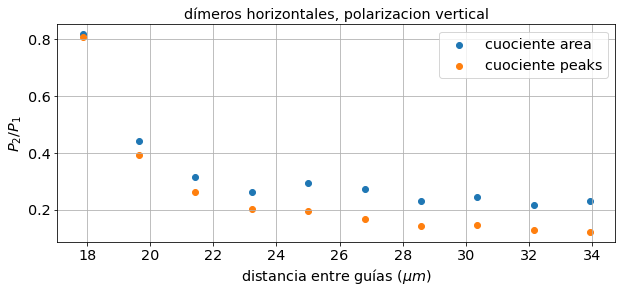

In [54]:
plt.figure(figsize=(10, 4))
d = np.sqrt(np.arange(10, 20)**2 + (1.48*np.arange(10, 20))**2)
plt.scatter(d, area_h, label='cuociente area')
plt.scatter(d, peak_h, label='cuociente peaks')
plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros diagonales, polarizacion vertical')
plt.legend()
plt.grid()

- Observamos que con el método de peaks hay un decaimiento exponencial
- No se ajusta a un decaimiento exponencial los valores obtenidos usando areas

## Ajustamos estos Cuocientes Análogo a lo Anterior

<ipython-input-45-2f802171478a>:2: RuntimeWarning: overflow encountered in exp
  def model(d, A, B): return A*np.exp(-B*d)


Area 

Parametros con CurveFit: 
A = 3.87, B = 0.10
Parametros con Polyfit: 
A = 1.48, B = 0.06

Peaks

Parametros con CurveFit: 
A = 21.34, B = 0.19
Parametros con Polyfit: 
A = 2.74, B = 0.10


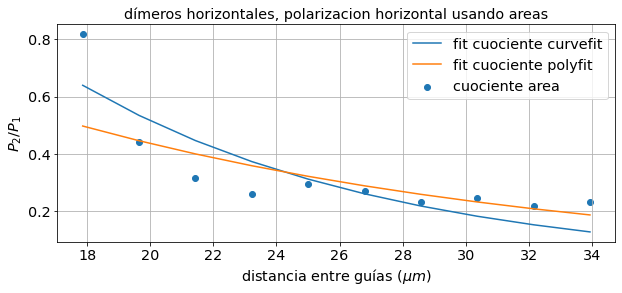

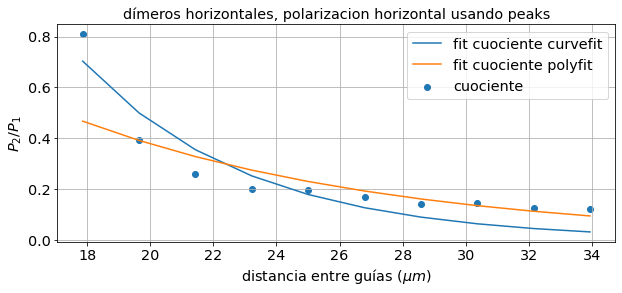

In [55]:
x0 = [1, 1]

params_area, params_area_std = optimize.curve_fit(model, d, area_h, x0)
params_peak, params_peak_std = optimize.curve_fit(model, d, peak_h, x0)

p_area = np.polyfit(d, np.log(area_h), 1)
p_peak = np.polyfit(d, np.log(peak_h), 1)

plt.figure(figsize=(10, 4))
plt.scatter(d, area_h, label='cuociente area')
plt.plot(d, model(d, params_area[0], params_area[1]), label='fit cuociente curvefit')

plt.plot(d, np.exp(p_area[0]*d + p_area[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando areas')
plt.legend()
plt.grid()

print('Area \n')
print(f'Parametros con CurveFit: \nA = {params_area[0]:.2f}, B = {params_area[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_area[1]):.2f}, B = {-p_area[0]:.2f}')


plt.figure(figsize=(10, 4))
plt.scatter(d, peak_h, label='cuociente')
plt.plot(d, model(d, params_peak[0], params_peak[1]), label='fit cuociente curvefit')

plt.plot(d, np.exp(p_peak[0]*d + p_peak[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando peaks')
plt.legend()
plt.grid()

print('\nPeaks\n')
print(f'Parametros con CurveFit: \nA = {params_peak[0]:.2f}, B = {params_peak[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_peak[1]):.2f}, B = {-p_peak[0]:.2f}')

# Polarizacion Vertical

Ploteamos las imagenes obtenidas para la polarización horizontal. La escala corresponde a valores entre 0 y 1, de una imagen BW.

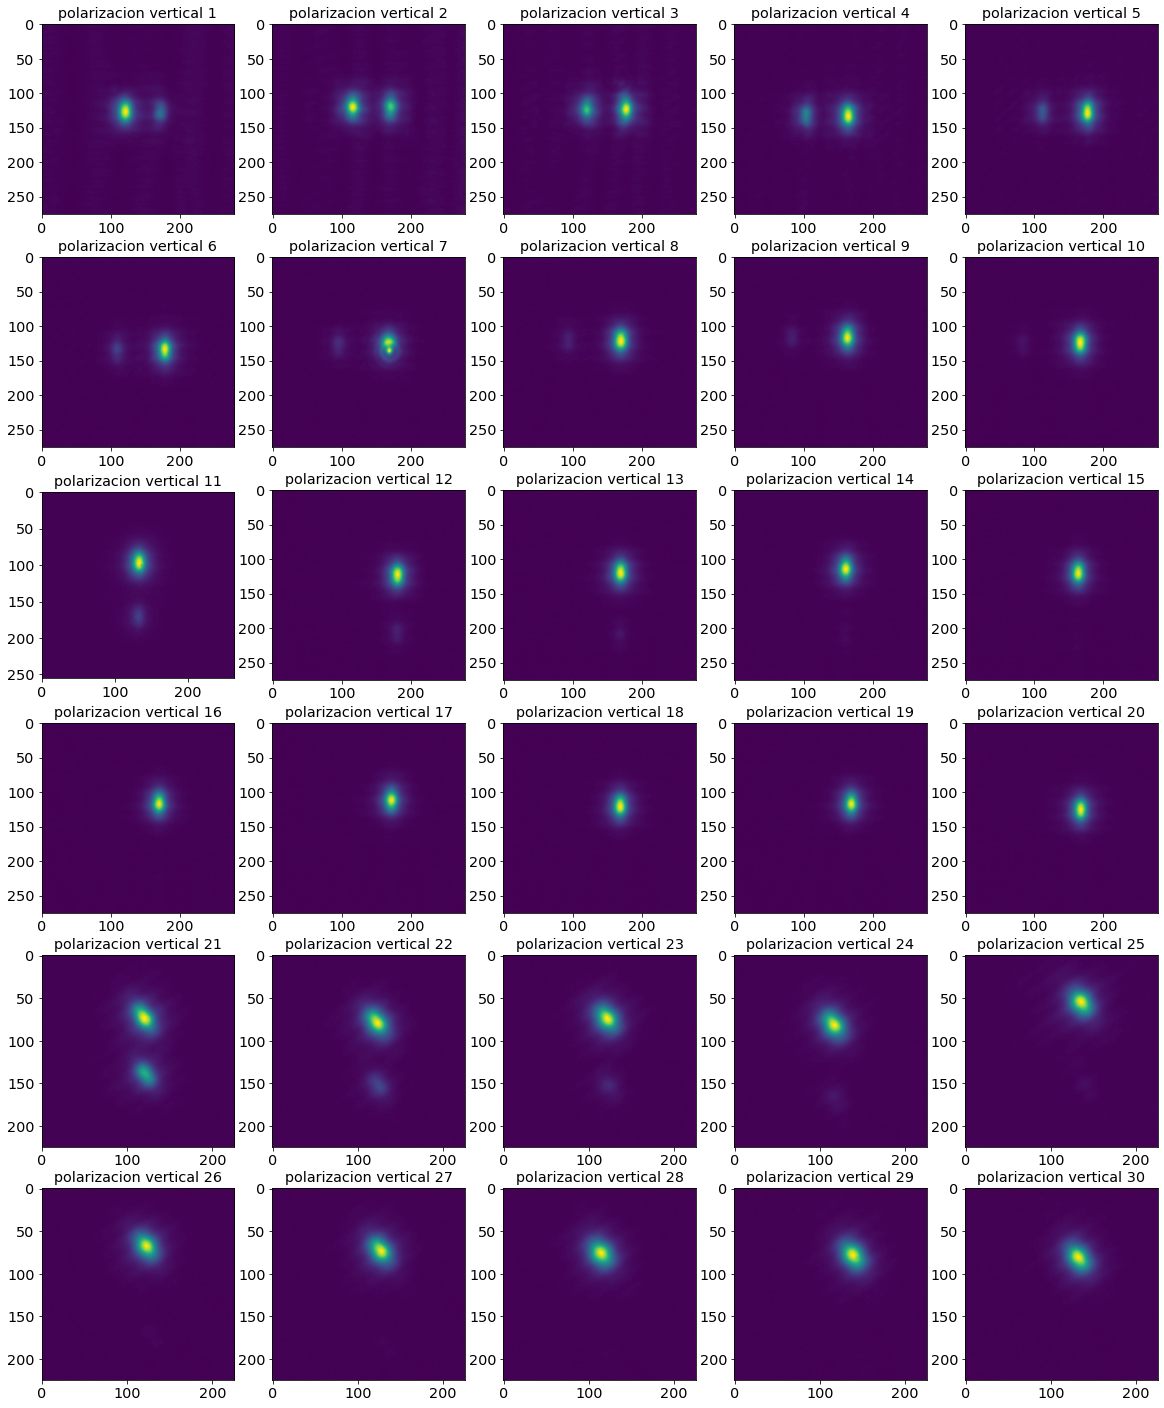

In [24]:
imagenes_v = []

cols = 5
fig, axes = plt.subplots(ncols=cols, nrows=6, figsize=(20,25))

for i in range(30):

    path = text1 + str(i+1) + text3

    if 20 <= i:
        degrees = 35
        rot = ndimage.rotate(mpimg.imread(path)[100:-120, 40:-850, 0], degrees)[150:-150, 150:-150]
        imagenes_v.append(rot)
        # imagenes_h.append(mpimg.imread(path)[120:-140, 60:-870, 0])

    elif i == 10:
        imagenes_v.append(mpimg.imread(path)[160:-180, 175:-830, 0])

    else:
        imagenes_v.append(mpimg.imread(path)[140:-180,90:-900, 0])

    col = i % cols
    row = i // cols

    

    axes[row][col].imshow(imagenes_v[i]);
    axes[row][col].set_title(f'polarizacion vertical {i+1}')
    # axes[row][col].legend()
    # axes[row][col].grid()

# Dímeros Horizontales con Polarizacion Vertical

Graficamos las potencias asociadas a cada imagen, sumando sobre el eje que muestre los dos perfiles de la señal.

Además obtenemos los maximos de cada dímero, y graficamos el rango que se considera para la obtención del área de la potencia en cada guía.

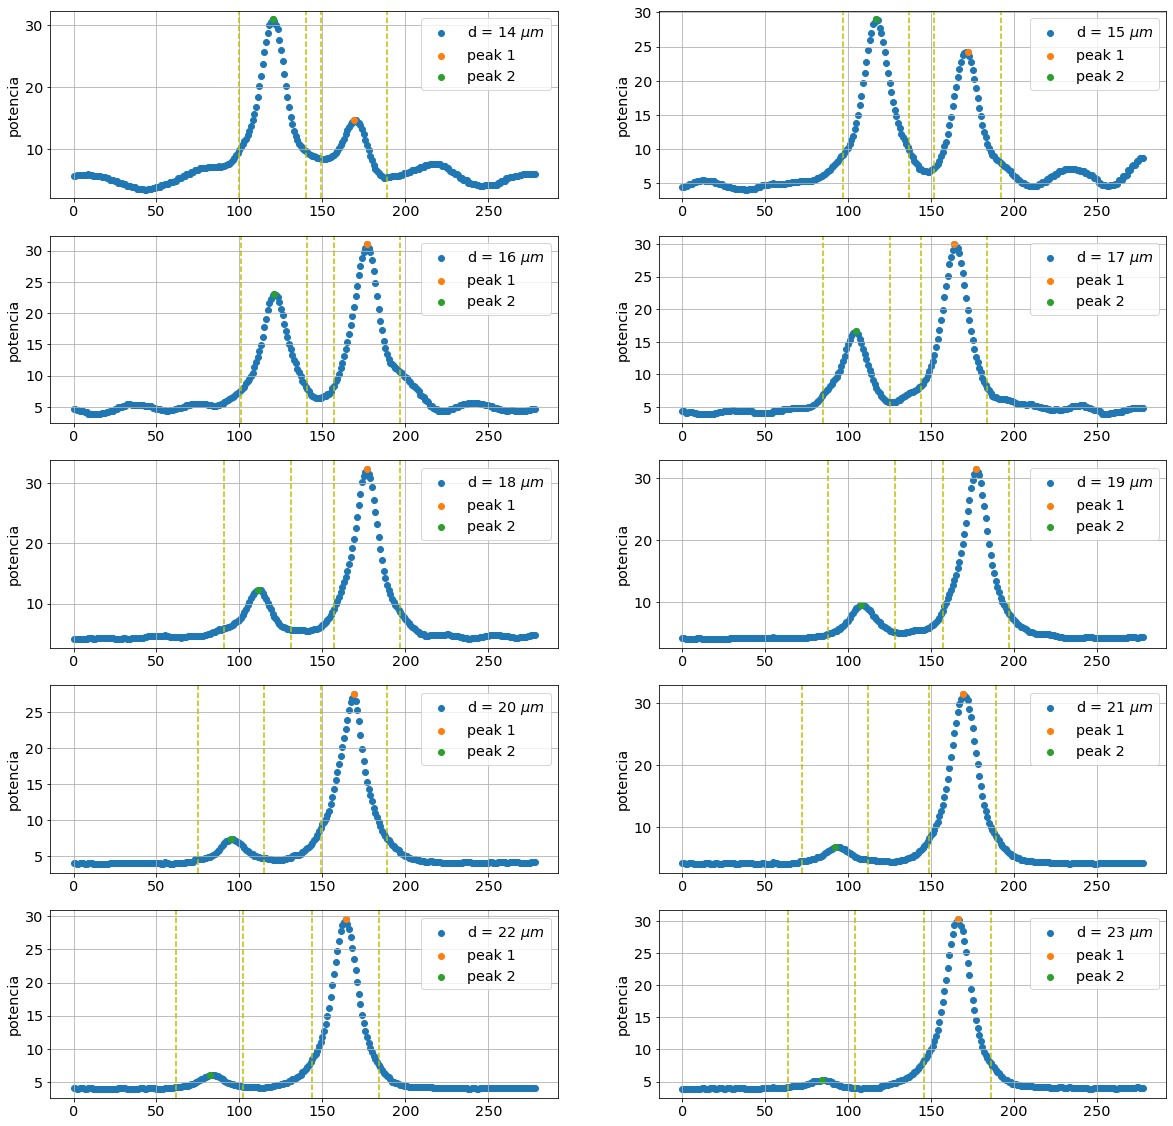

In [25]:
potencias_v = []
area_h = []
peak_h = []

width = 20

for i in range(30):

    if i < 10:
        P = np.sum(imagenes_v[i], axis=0)
    else:
        P = np.sum(imagenes_v[i], axis=1)
    
    potencias_v.append(P)
    
# Ploteamos
cols = 2
fig, axes = plt.subplots(ncols=cols, nrows=5, figsize=(20,20))

for i in range(10):
    
    col = i % cols
    row = i // cols

    axes[row][col].scatter(np.arange(len(potencias_v[i])), potencias_v[i], label=f'd = {np.arange(14, 24)[i]} $\\mu m$');
    # axes[row][col].set_title(f'horizontal {i+1}')

    if i >= 2:
        arg_p_max1 = np.argmax(potencias_v[i])
        arg_p_max2 = np.argmax(potencias_v[i][:arg_p_max1-2*width])

        axes[row][col].scatter(arg_p_max1, potencias_v[i][arg_p_max1], label='peak 1')
        axes[row][col].scatter(arg_p_max2, potencias_v[i][arg_p_max2], label='peak 2')
    
    else:
        arg_p_max2 = np.argmax(potencias_v[i])
        arg_p_max1 = arg_p_max2+2*width + np.argmax(potencias_v[i][arg_p_max2+2*width:])

        axes[row][col].scatter(arg_p_max1, potencias_v[i][arg_p_max1], label='peak 1')
        axes[row][col].scatter(arg_p_max2, potencias_v[i][arg_p_max2], label='peak 2')

    axes[row][col].axvline(arg_p_max1 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max1 + width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 + width, color='y', linestyle='dashed')

    a = np.sum(potencias_v[i][arg_p_max1 - width:arg_p_max1 + width])
    b = np.sum(potencias_v[i][arg_p_max2 - width:arg_p_max2 + width])
    area_h.append(b / a)
    peak_h.append(potencias_v[i][arg_p_max2] / potencias_v[i][arg_p_max1])

    axes[row][col].set_ylabel('potencia')
    axes[row][col].legend()
    axes[row][col].grid()
    


## Grafico del Ratio de Intensidades $P_1 / P_2$

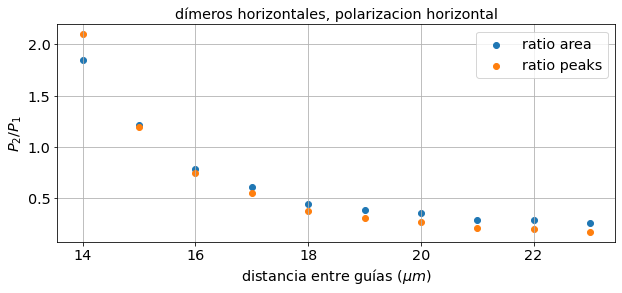

In [26]:
plt.figure(figsize=(10, 4))
plt.scatter(np.arange(14, 24), area_h, label='ratio area')
plt.scatter(np.arange(14, 24), peak_h, label='ratio peaks')
plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal')
plt.legend()
plt.grid()

- Observamos que un decaimiento exponencial claro en funcion de la distancia entre guías

# Ajuste de las curvas de acoplamiento
Se hace un fiteo exponencial de la forma $A\exp(-Bd)$ con $A, B$ constantes a determinar, y $d$ la distancia entre guías.

Para esto se ocupan los programas

- *curvefit* de scipy
- *polyfit* de numpy

<ipython-input-15-2f802171478a>:2: RuntimeWarning: overflow encountered in exp
  def model(d, A, B): return A*np.exp(-B*d)


Area 

Parametros con CurveFit: 
A = 129.53, B = 0.31
Parametros con Polyfit: 
A = 24.57, B = 0.21

Peaks

Parametros con CurveFit: 
A = 692.11, B = 0.42
Parametros con Polyfit: 
A = 56.73, B = 0.26


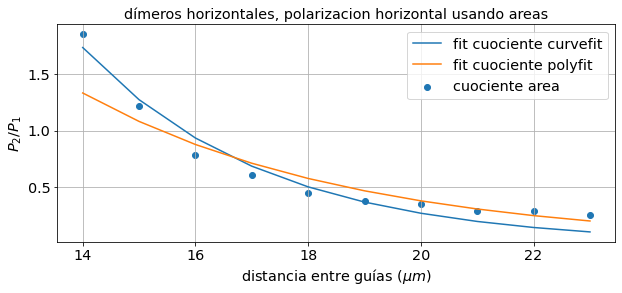

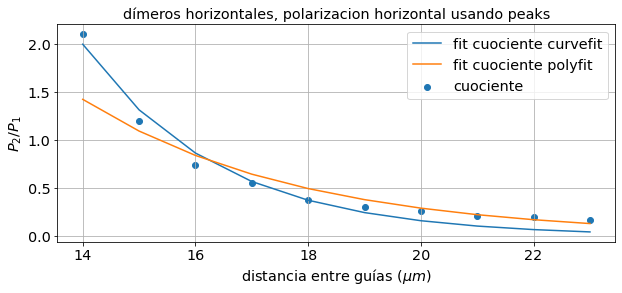

In [27]:
x0 = [1, 1]

# Ajuste
params_area, params_area_std = optimize.curve_fit(model, np.arange(14, 24), area_h, x0)
params_peak, params_peak_std = optimize.curve_fit(model, np.arange(14, 24), peak_h, x0)

p_area = np.polyfit(np.arange(14, 24), np.log(area_h), 1)
p_peak = np.polyfit(np.arange(14, 24), np.log(peak_h), 1)

# Ploteo
plt.figure(figsize=(10, 4))
plt.scatter(np.arange(14, 24), area_h, label='cuociente area')
plt.plot(np.arange(14, 24), model(np.arange(14, 24), params_area[0], params_area[1]), label='fit cuociente curvefit')

plt.plot(np.arange(14, 24), np.exp(p_area[0]*np.arange(14, 24) + p_area[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando areas')
plt.legend()
plt.grid()

print('Area \n')
print(f'Parametros con CurveFit: \nA = {params_area[0]:.2f}, B = {params_area[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_area[1]):.2f}, B = {-p_area[0]:.2f}')


plt.figure(figsize=(10, 4))
plt.scatter(np.arange(14, 24), peak_h, label='cuociente')
plt.plot(np.arange(14, 24), model(np.arange(14, 24), params_peak[0], params_peak[1]), label='fit cuociente curvefit')

plt.plot(np.arange(14, 24), np.exp(p_peak[0]*np.arange(14, 24) + p_peak[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando peaks')
plt.legend()
plt.grid()

print('\nPeaks\n')
print(f'Parametros con CurveFit: \nA = {params_peak[0]:.2f}, B = {params_peak[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_peak[1]):.2f}, B = {-p_peak[0]:.2f}')

# Dímeros Verticales con Polarizacion Vertical
Graficamos las potencias asociadas a cada imagen, sumando sobre el eje que muestre los dos perfiles de la señal.

Además obtenemos los maximos de cada dímero, y graficamos el rango que se considera para la obtención del área de la potencia en cada guía.

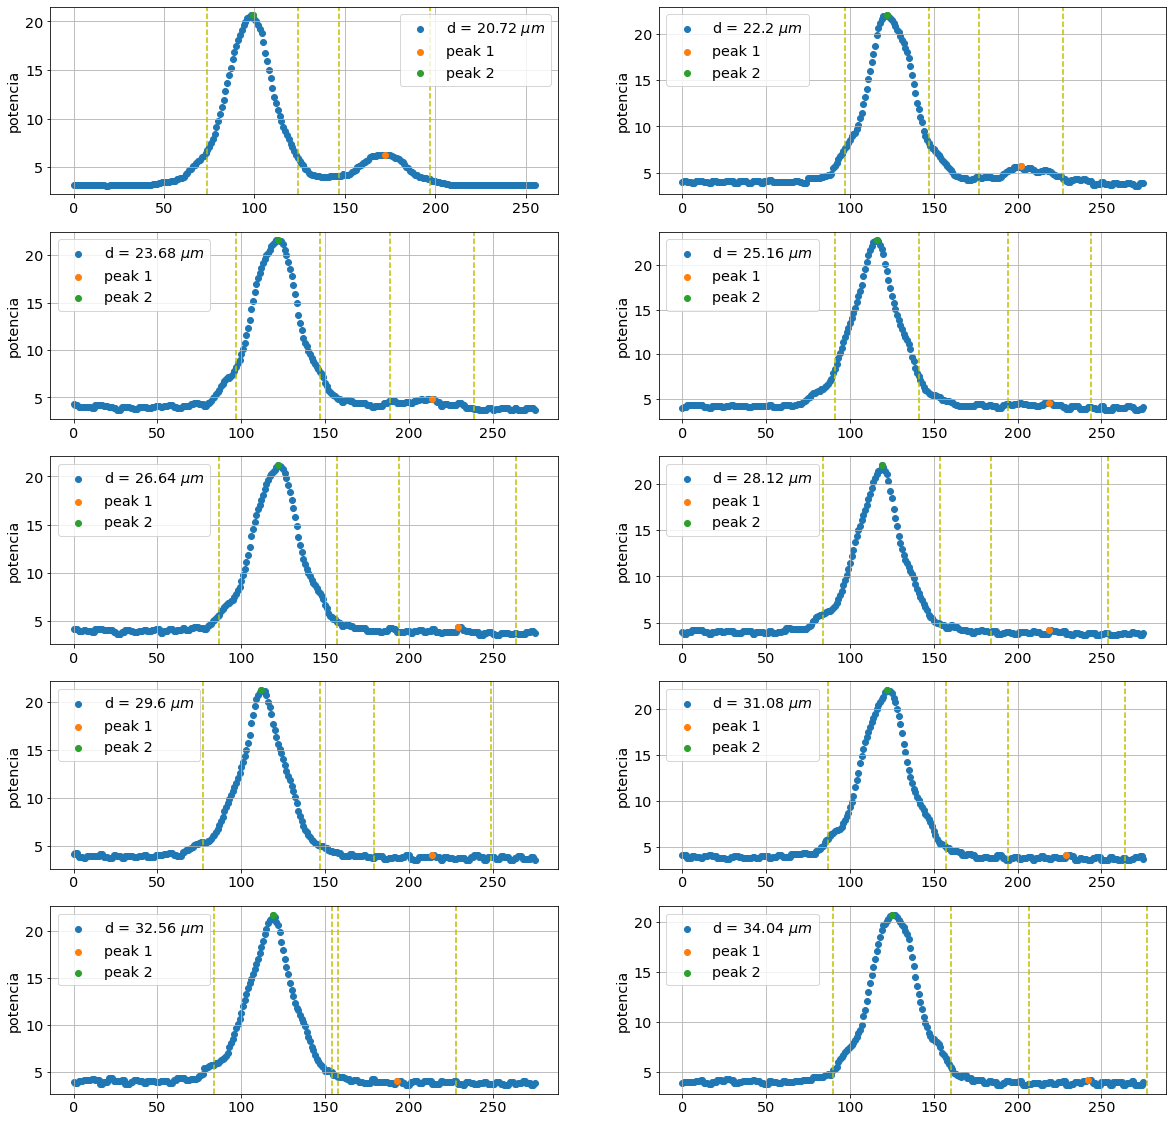

In [28]:
area_h = []
peak_h = []

width = 20

cols = 2
fig, axes = plt.subplots(ncols=cols, nrows=5, figsize=(20,20))

for i in range(10, 20):
    
    col = (i-10) % cols
    row = (i-10) // cols

    axes[row][col].scatter(np.arange(len(potencias_v[i])), potencias_v[i], label=f'd = {1.48*np.arange(14, 24)[i-10]} $\\mu m$');
    # axes[row][col].set_title(f'horizontal {i+1}')

    # if i >= 3:
    # arg_p_max1 = np.argmax(potencias_v[i])
    # arg_p_max2 = arg_p_max2+2*width + np.argmax(potencias_v[i][arg_p_max1+2*width:])

    # axes[row][col].scatter(arg_p_max1, potencias_v[i][arg_p_max1])
    # axes[row][col].scatter(arg_p_max2, potencias_v[i][arg_p_max2])
    
    # else:

    if i-10 < 4:
        width = 25

    else:
        width = 35

    arg_p_max2 = np.argmax(potencias_v[i])
    arg_p_max1 = arg_p_max2+2*width + np.argmax(potencias_v[i][arg_p_max2+2*width:])

    axes[row][col].scatter(arg_p_max1, potencias_v[i][arg_p_max1], label='peak 1')
    axes[row][col].scatter(arg_p_max2, potencias_v[i][arg_p_max2], label='peak 2')

    axes[row][col].axvline(arg_p_max1 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max1 + width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 + width, color='y', linestyle='dashed')

    a = np.sum(potencias_v[i][arg_p_max1 - width:arg_p_max1 + width])
    b = np.sum(potencias_v[i][arg_p_max2 - width:arg_p_max2 + width])
    area_h.append(a / b)
    peak_h.append(potencias_v[i][arg_p_max1] / potencias_v[i][arg_p_max2])

    axes[row][col].set_ylabel('potencia')
    axes[row][col].legend()
    axes[row][col].grid()


# Gráfico de Ratio de Intensidades $P_1/P_2$

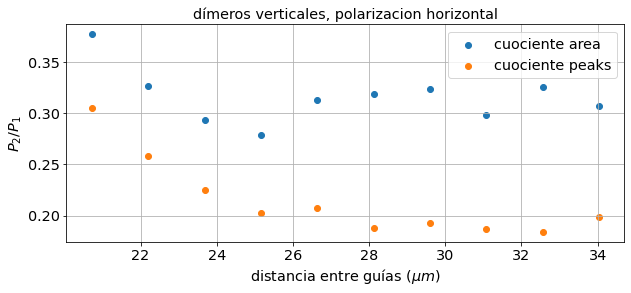

In [29]:
plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 24), area_h, label='cuociente area')
plt.scatter(1.48*np.arange(14, 24), peak_h, label='cuociente peaks')
plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros verticales, polarizacion horizontal')
plt.legend()
plt.grid()

- Observamos que con el método de **peaks** hay un decaimiento exponencial
- No se ajusta a un decaimiento exponencial los valores obtenidos usando areas

## Ajustamos estos Cuocientes Análogo a lo Anterior

Area 

Parametros con CurveFit: 
A = 0.38, B = 0.01
Parametros con Polyfit: 
A = 0.37, B = 0.01

Peaks

Parametros con CurveFit: 
A = 0.56, B = 0.04
Parametros con Polyfit: 
A = 0.49, B = 0.03


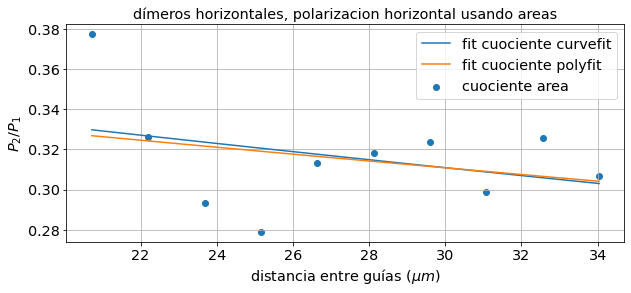

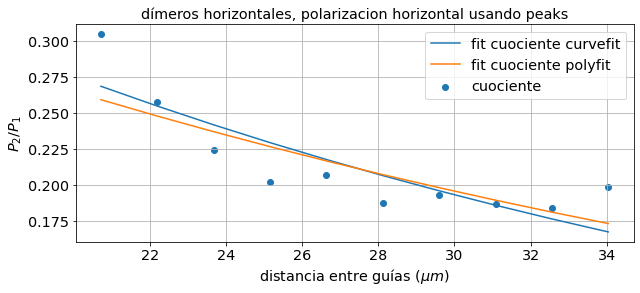

In [30]:
x0 = [1, 0.001]

params_area, params_area_std = optimize.curve_fit(model, 1.48*np.arange(14, 24), area_h, x0)
params_peak, params_peak_std = optimize.curve_fit(model, 1.48*np.arange(14, 24), peak_h, x0)

p_area = np.polyfit(1.48*np.arange(14, 24), np.log(area_h), 1)
p_peak = np.polyfit(1.48*np.arange(14, 24), np.log(peak_h), 1)

plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 24), area_h, label='cuociente area')
plt.plot(1.48*np.arange(14, 24), model(1.48*np.arange(14, 24), params_area[0], params_area[1]), label='fit cuociente curvefit')

plt.plot(1.48*np.arange(14, 24), np.exp(p_area[0]*1.48*np.arange(14, 24) + p_area[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando areas')
plt.legend()
plt.grid()

print('Area \n')
print(f'Parametros con CurveFit: \nA = {params_area[0]:.2f}, B = {params_area[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_area[1]):.2f}, B = {-p_area[0]:.2f}')


plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 24), peak_h, label='cuociente')
plt.plot(1.48*np.arange(14, 24), model(1.48*np.arange(14, 24), params_peak[0], params_peak[1]), label='fit cuociente curvefit')

plt.plot(1.48*np.arange(14, 24), np.exp(p_peak[0]*1.48*np.arange(14, 24) + p_peak[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando peaks')
plt.legend()
plt.grid()

print('\nPeaks\n')
print(f'Parametros con CurveFit: \nA = {params_peak[0]:.2f}, B = {params_peak[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_peak[1]):.2f}, B = {-p_peak[0]:.2f}')

- Los ajustes no se adecuan correctamente al data
- Intentaremos hacer un analisis **con los primero valores**

# Ajuste con los Primeros Valores

Area 

Parametros con CurveFit: 
A = 1.62, B = 0.07
Parametros con Polyfit: 
A = 1.52, B = 0.07

Peaks

Parametros con CurveFit: 
A = 1.15, B = 0.07
Parametros con Polyfit: 
A = 1.02, B = 0.06


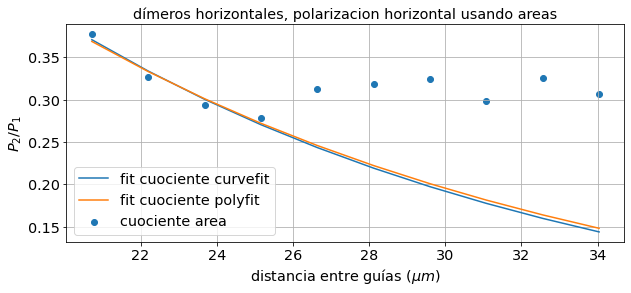

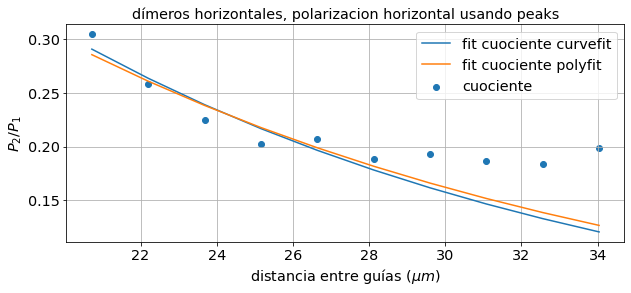

In [31]:
x0 = [1, 0.001]

params_area, params_area_std = optimize.curve_fit(model, 1.48*np.arange(14, 18), area_h[:4], x0)
params_peak, params_peak_std = optimize.curve_fit(model, 1.48*np.arange(14, 20), peak_h[:-4], x0)

p_area = np.polyfit(1.48*np.arange(14, 18), np.log(area_h[:4]), 1)
p_peak = np.polyfit(1.48*np.arange(14, 20), np.log(peak_h[:-4]), 1)

plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 24), area_h, label='cuociente area')
plt.plot(1.48*np.arange(14, 24), model(1.48*np.arange(14, 24), params_area[0], params_area[1]), label='fit cuociente curvefit')

plt.plot(1.48*np.arange(14, 24), np.exp(p_area[0]*1.48*np.arange(14, 24) + p_area[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando areas')
plt.legend()
plt.grid()

print('Area \n')
print(f'Parametros con CurveFit: \nA = {params_area[0]:.2f}, B = {params_area[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_area[1]):.2f}, B = {-p_area[0]:.2f}')


plt.figure(figsize=(10, 4))
plt.scatter(1.48*np.arange(14, 24), peak_h, label='cuociente')
plt.plot(1.48*np.arange(14, 24), model(1.48*np.arange(14, 24), params_peak[0], params_peak[1]), label='fit cuociente curvefit')

plt.plot(1.48*np.arange(14, 24), np.exp(p_peak[0]*1.48*np.arange(14, 24) + p_peak[1]), label='fit cuociente polyfit')

plt.ylabel('$P_2 / P_1$')
plt.xlabel('distancia entre guías ($\\mu m$)')
plt.title('dímeros horizontales, polarizacion horizontal usando peaks')
plt.legend()
plt.grid()

print('\nPeaks\n')
print(f'Parametros con CurveFit: \nA = {params_peak[0]:.2f}, B = {params_peak[1]:.2f}')
print(f'Parametros con Polyfit: \nA = {np.exp(p_peak[1]):.2f}, B = {-p_peak[0]:.2f}')

- Vemos que de esta forma se ajustan de mejor manera a los primeros datos

# Dímeros Diagonales con Polarizacion Vertical

Graficamos las potencias asociadas a cada imagen, sumando sobre el eje que muestre los dos perfiles de la señal.

Además obtenemos los maximos de cada dímero, y graficamos el rango que se considera para la obtención del área de la potencia en cada guía.

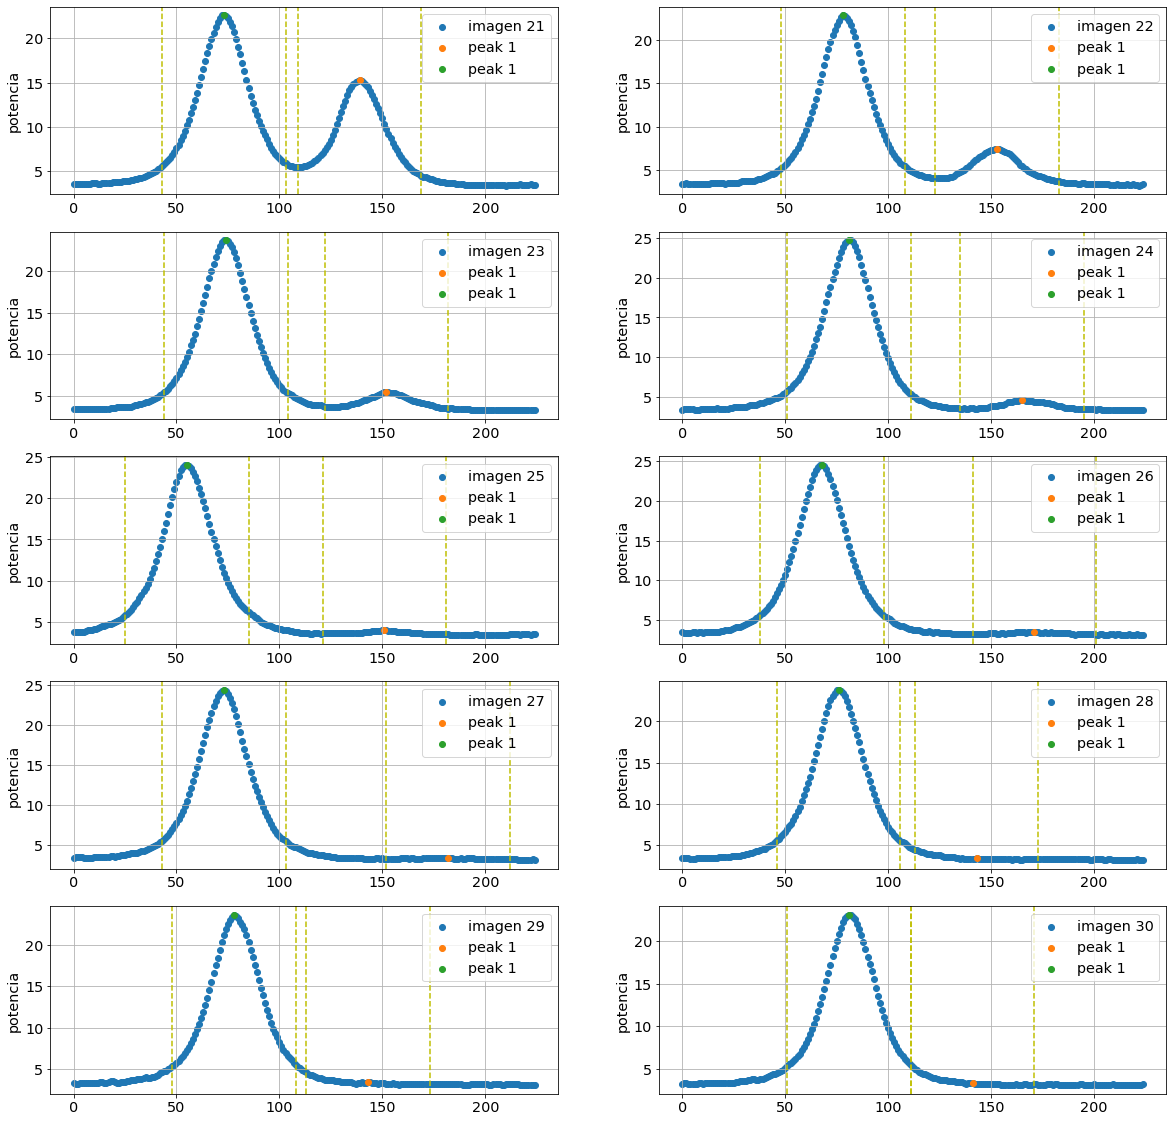

In [32]:
area_h = []
peak_h = []

width = 30

cols = 2
fig, axes = plt.subplots(ncols=cols, nrows=5, figsize=(20,20))

for i in range(20, 30):
    
    col = (i-20) % cols
    row = (i-20) // cols

    axes[row][col].scatter(np.arange(len(potencias_v[i])), potencias_v[i], label=f'imagen {i+1}');
    # axes[row][col].set_title(f'horizontal {i+1}')

    # if i >= 3:
    # arg_p_max1 = np.argmax(potencias_v[i])
    # arg_p_max2 = arg_p_max2+2*width + np.argmax(potencias_v[i][arg_p_max1+2*width:])

    # axes[row][col].scatter(arg_p_max1, potencias_v[i][arg_p_max1])
    # axes[row][col].scatter(arg_p_max2, potencias_v[i][arg_p_max2])
    
    # else:

    arg_p_max2 = np.argmax(potencias_v[i])
    arg_p_max1 = arg_p_max2+2*width + np.argmax(potencias_v[i][arg_p_max2+2*width:])

    axes[row][col].scatter(arg_p_max1, potencias_v[i][arg_p_max1], label='peak 1')
    axes[row][col].scatter(arg_p_max2, potencias_v[i][arg_p_max2], label='peak 1')

    axes[row][col].axvline(arg_p_max1 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max1 + width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 - width, color='y', linestyle='dashed')
    axes[row][col].axvline(arg_p_max2 + width, color='y', linestyle='dashed')

    a = np.sum(potencias_v[i][arg_p_max1 - width:arg_p_max1 + width])
    b = np.sum(potencias_v[i][arg_p_max2 - width:arg_p_max2 + width])
    area_h.append(a / b)
    peak_h.append(potencias_v[i][arg_p_max1] / potencias_v[i][arg_p_max2])

    axes[row][col].set_ylabel('potencia')
    axes[row][col].legend()
    axes[row][col].grid()


# Determinacion del Perfil Espacial del Modo Fundamental

Seleccionamos una imagen con poco acoplamiento para la determinación del perfil gaussiano del modo fundamental. Esto se realiza mediante un fiteo gaussiano y la determinación de la razón pixeles/micrómetro via el dato de la distancia entre los centro de las guías.

De la actividad anterior, el mejor candidato para realizar el analisis resulta en la imagen 1 de la polarizacion horizontal, correspondiente a un dímero horizontal con polarizacion horizontal y separación de 14 micrómetros.

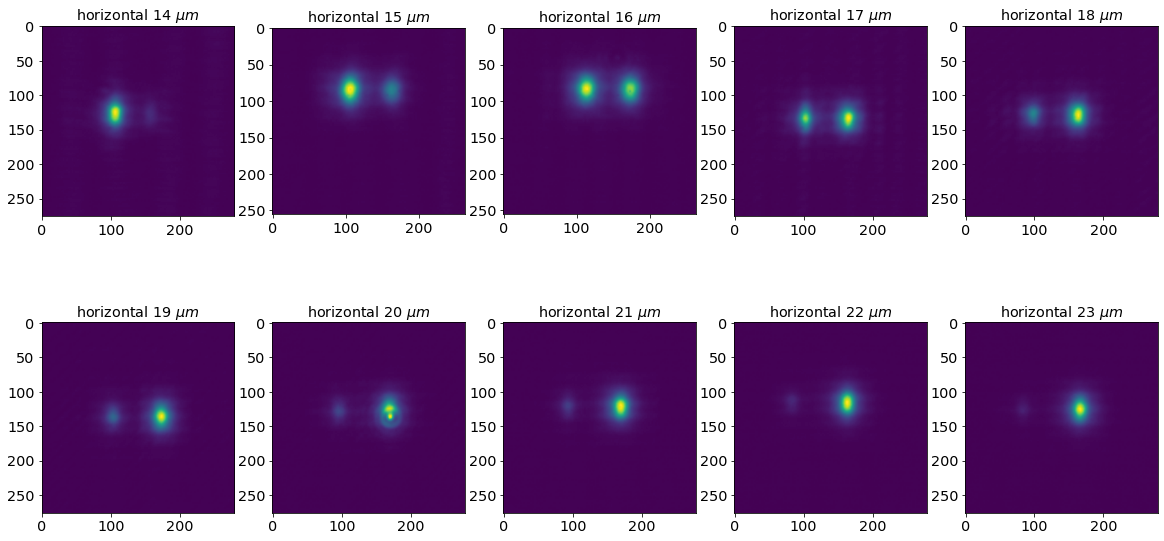

In [33]:
img_acoplamiento = []

from scipy import ndimage
# import matplotlib.image as mpimg

cols = 5
fig, axes = plt.subplots(ncols=cols, nrows=2, figsize=(20,10))

for i in range(10):
    
    path = text1 + str(i+1) + text2
    if i == 1 or i == 2:
        img_acoplamiento.append(mpimg.imread(path)[160:-180, 255:-750, 0])

    else:
        img_acoplamiento.append(mpimg.imread(path)[140:-180, 90:-900, 0])

    col = i % cols
    row = i // cols

    axes[row][col].imshow(img_acoplamiento[i]);
    axes[row][col].set_title(f'horizontal {np.arange(14, 24)[i]} $\\mu m$')

## Para obtener el factor de conversion, obtenemos los centros de la imagen con distancia d = 17 micrometros via estudio del perfil de potencia

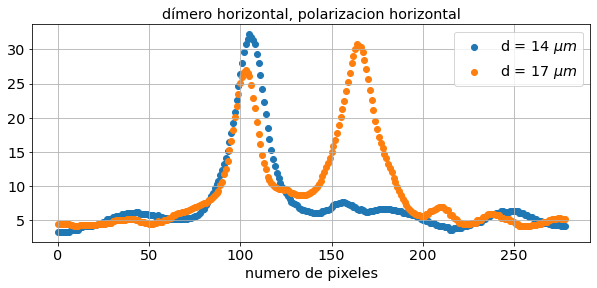

In [34]:
p_img14 = np.sum(img_acoplamiento[0], axis=0)
p_img17 = np.sum(img_acoplamiento[3], axis=0)

plt.figure(figsize=(10, 4))
plt.scatter(np.arange(len(p_img14)), p_img14, label='d = 14 $\\mu m$')
plt.scatter(np.arange(len(p_img17)), p_img17, label='d = 17 $\\mu m$')
plt.title('dímero horizontal, polarizacion horizontal')
plt.xlabel('numero de pixeles')
plt.legend()
plt.grid()

### Obtenemos los maximos para d = 17 micrómetros

factor de conversion pixel/micrometro = 4.88


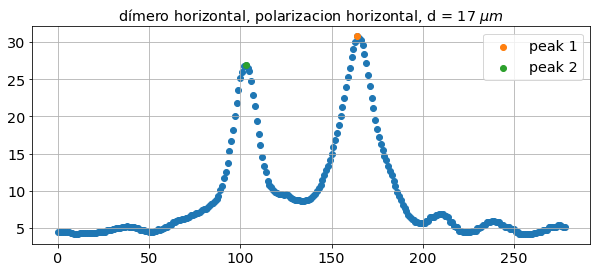

In [35]:
# determinamos la distancia entre los maximos para d = 17 micrometros

argmax1 = np.argmax(p_img17)
argmax2 = np.argmax(p_img17[:argmax1-30])

plt.figure(figsize=(10, 4))
plt.scatter(np.arange(len(p_img17)), p_img17)
plt.scatter(argmax1, p_img17[argmax1], label='peak 1')
plt.scatter(argmax2, p_img17[argmax2], label='peak 2')
plt.title('dímero horizontal, polarizacion horizontal, d = 17 $\\mu m$')
plt.legend()
plt.grid()

distancia = argmax1 - arg_p_max2
factor = distancia / 17
print(f'factor de conversion pixel/micrometro = {factor:.2f}')

# Fit Gaussiano

Definimos las funciones que ocuparemos para el fiteo gaussiano

In [36]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

## Ajustamos la imagen. la ploteamos y la superponemos con el ajuste realizado.

<Figure size 504x311.489 with 0 Axes>

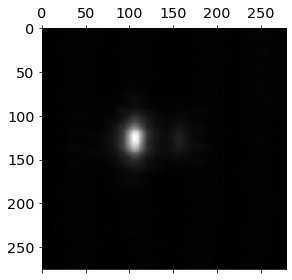

<Figure size 504x311.489 with 0 Axes>

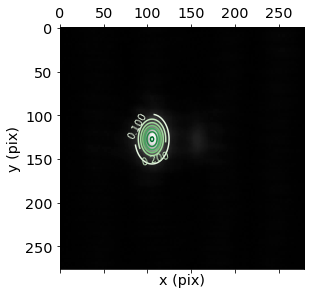

In [37]:
# Ajustamos

data = img_acoplamiento[0]

params = fitgaussian(data)

fiteo = gaussian(*params)

# Ploteamos la imagen estudiada
plt.figure(1)
plt.matshow(data, cmap=plt.cm.get_cmap("gray"))
plt.show()

# Superponemos el fiteo del modo fundamental en la imagen
plt.figure(1)
plt.matshow(data, cmap=plt.cm.get_cmap("gray"))
CS = plt.contour(fiteo(*np.indices(data.shape)), cmap=plt.cm.get_cmap("Greens"))
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

plt.show()

# Obtencion de los Parámetros Reales del Modo Fundamental

Para obtener los **parámetros reales** de la gaussiana del modo fundamental, **convertimos** los parámetros obtenidos usando el factor de conversion

Text(0, 0.5, 'y $(\\mu m)$')

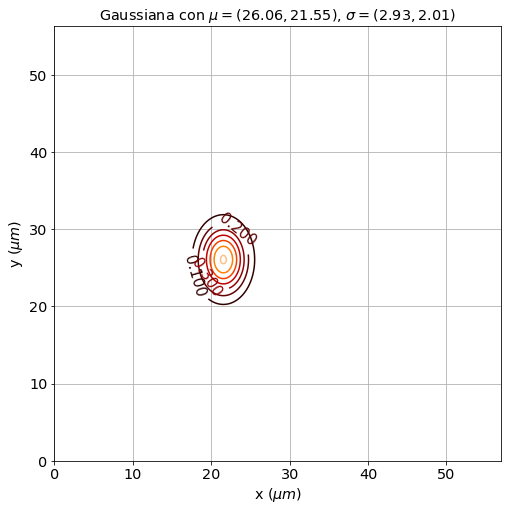

In [38]:
xx = np.arange(0, 279) / factor
yy = np.arange(0, 276) / factor

XX, YY = np.meshgrid(xx, yy)

fig, ax = plt.subplots(figsize=(8,8))

parametros = [params[0], params[1] / factor, params[2] / factor, params[3] / factor, params[4] / factor]

fit = gaussian(*parametros)

Z = fit(*np.indices(data.shape) / factor)

CS = ax.contour(XX, YY, Z, cmap=plt.cm.get_cmap("gist_heat"))
plt.clabel(CS, inline=1, fontsize=15)

plt.grid(True)
ax.set_title(f'Gaussiana con $\\mu = ({parametros[1]:.2f}, {parametros[2]:.2f})$, $\\sigma =  ({parametros[3]:.2f}, {parametros[4]:.2f})$')
plt.xlabel('x $(\\mu m)$')
plt.ylabel('y $(\\mu m)$')

Con esto concluimos que el modo fundamental para el dímero horizontal se ajusta a una Gaussiana con parámetros

$$ \mu = (26.06, 21.55), \quad \sigma = (2.93, 2.01)$$

medidos en micrómetros.